### Copyright (C) 2022 Sobhan Moradian Daghigh
#### Date: 2/17/2022

### Import Libraries

In [1]:
import numpy as np
from PIL import Image
from skimage import color
from scipy.spatial.distance import cdist
from IPython.display import display
import matplotlib.pyplot as plt
import glob

### Loading Images

In [2]:
def load_datas(folder_name):
    print('Loading Images..\n')
    images = []
    files = glob.glob('{}/*.jpg'.format(folder_name))
    for image in files:
        img = Image.open(image)
        print('  |_  {} loaded.'.format(image.split('\\')[-1][:-4]))
        display(img)
        images.append(img)
        
    return images

Loading Images..

  |_  bird loaded.


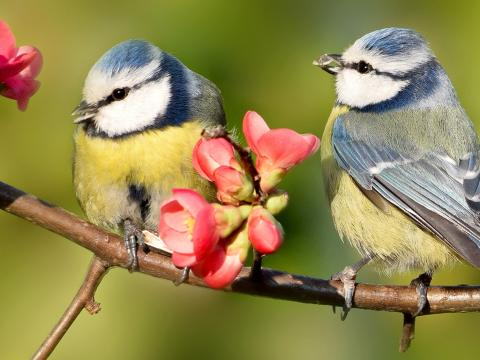

  |_  car loaded.


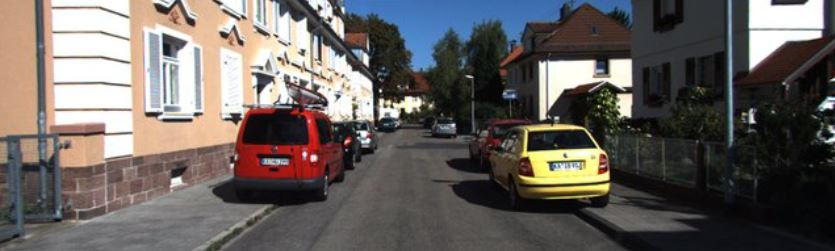

  |_  holi-festival loaded.


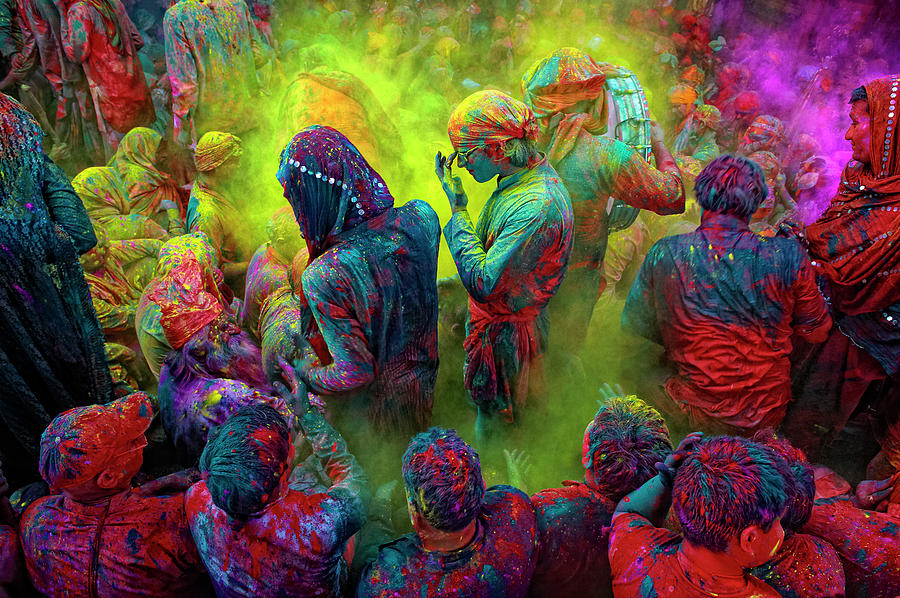

In [3]:
images = load_datas(folder_name='./data/2')

In [4]:
def rgb2lab(image):
    return color.rgb2lab(image)

In [5]:
def lab2rgb(image):
    return color.lab2rgb(image)

In [6]:
def reshaper(image):
    width, height, depth = image.shape
    reshaped = np.reshape(image, (width * height, depth))
    return reshaped, width, height

In [7]:
def reconstructor(centroids, labels, width, height):
    return np.reshape(centroids[labels], (width, height, centroids.shape[1]))    

In [15]:
def kmeans(x, n_clusters, n_init=50):
    
    iterr = 0
    idx = np.random.RandomState(1).choice(len(x), n_clusters, replace=False)
    centroids = x[idx, :]
    distances = cdist(x, centroids ,'euclidean')
    labels = np.array([np.argmin(i) for i in distances])
    
    while iterr <= n_init:
        pre_centroids = centroids
        centroids = []
        for idx in range(n_clusters):
            center = x[labels==idx].mean(axis=0) 
            centroids.append(center)

        centroids = np.vstack(centroids) 
        
        if np.equal(pre_centroids, centroids).all():
            return labels, centroids

        distances = cdist(x, centroids ,'euclidean')
        labels = np.array([np.argmin(i) for i in distances])
        iterr += 1

    return labels, centroids

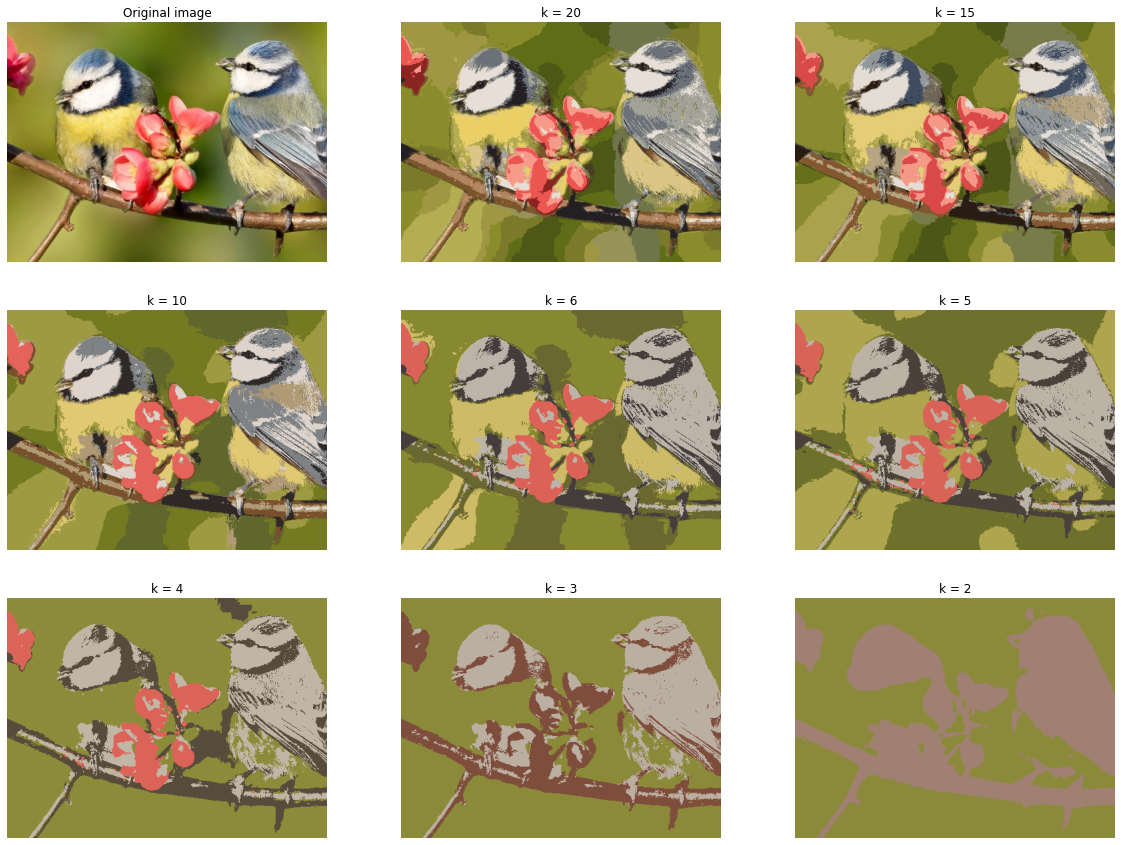

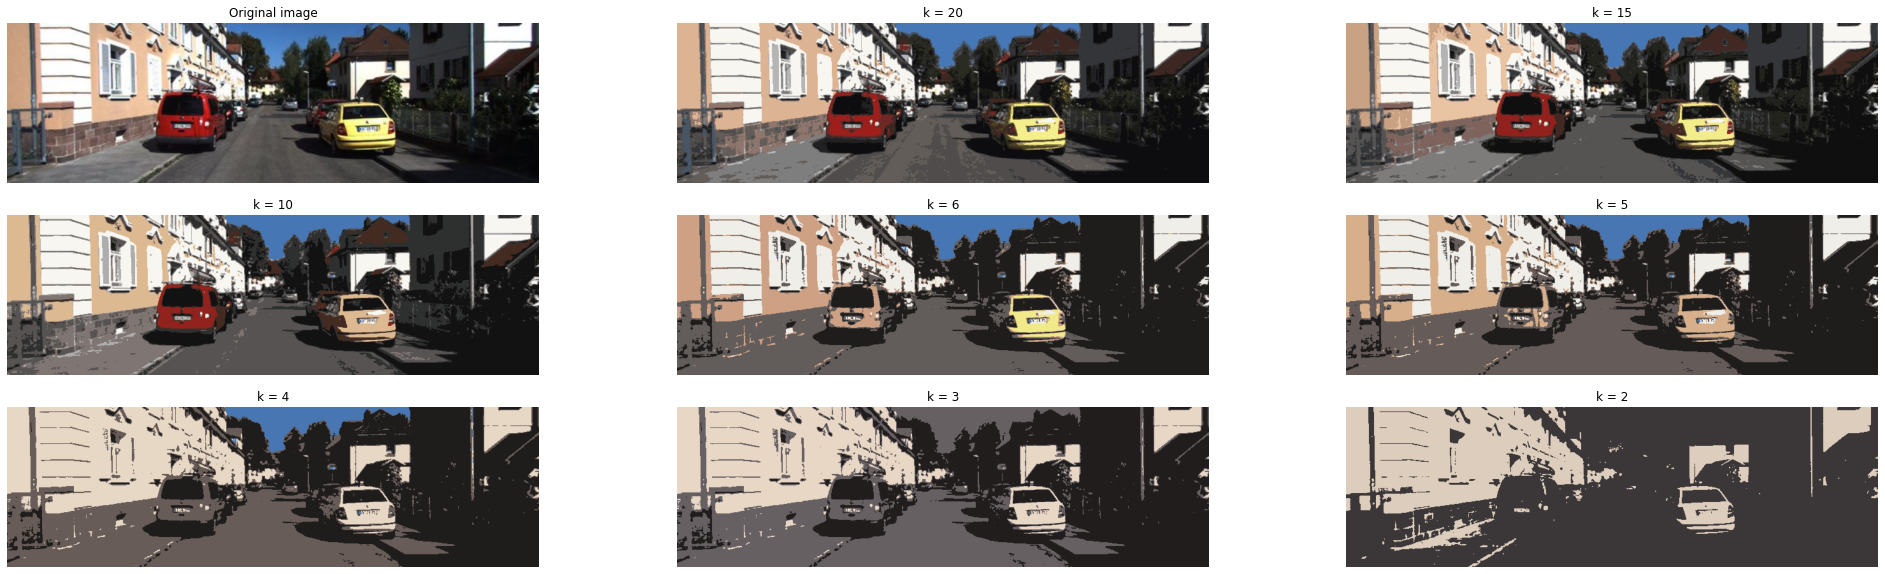

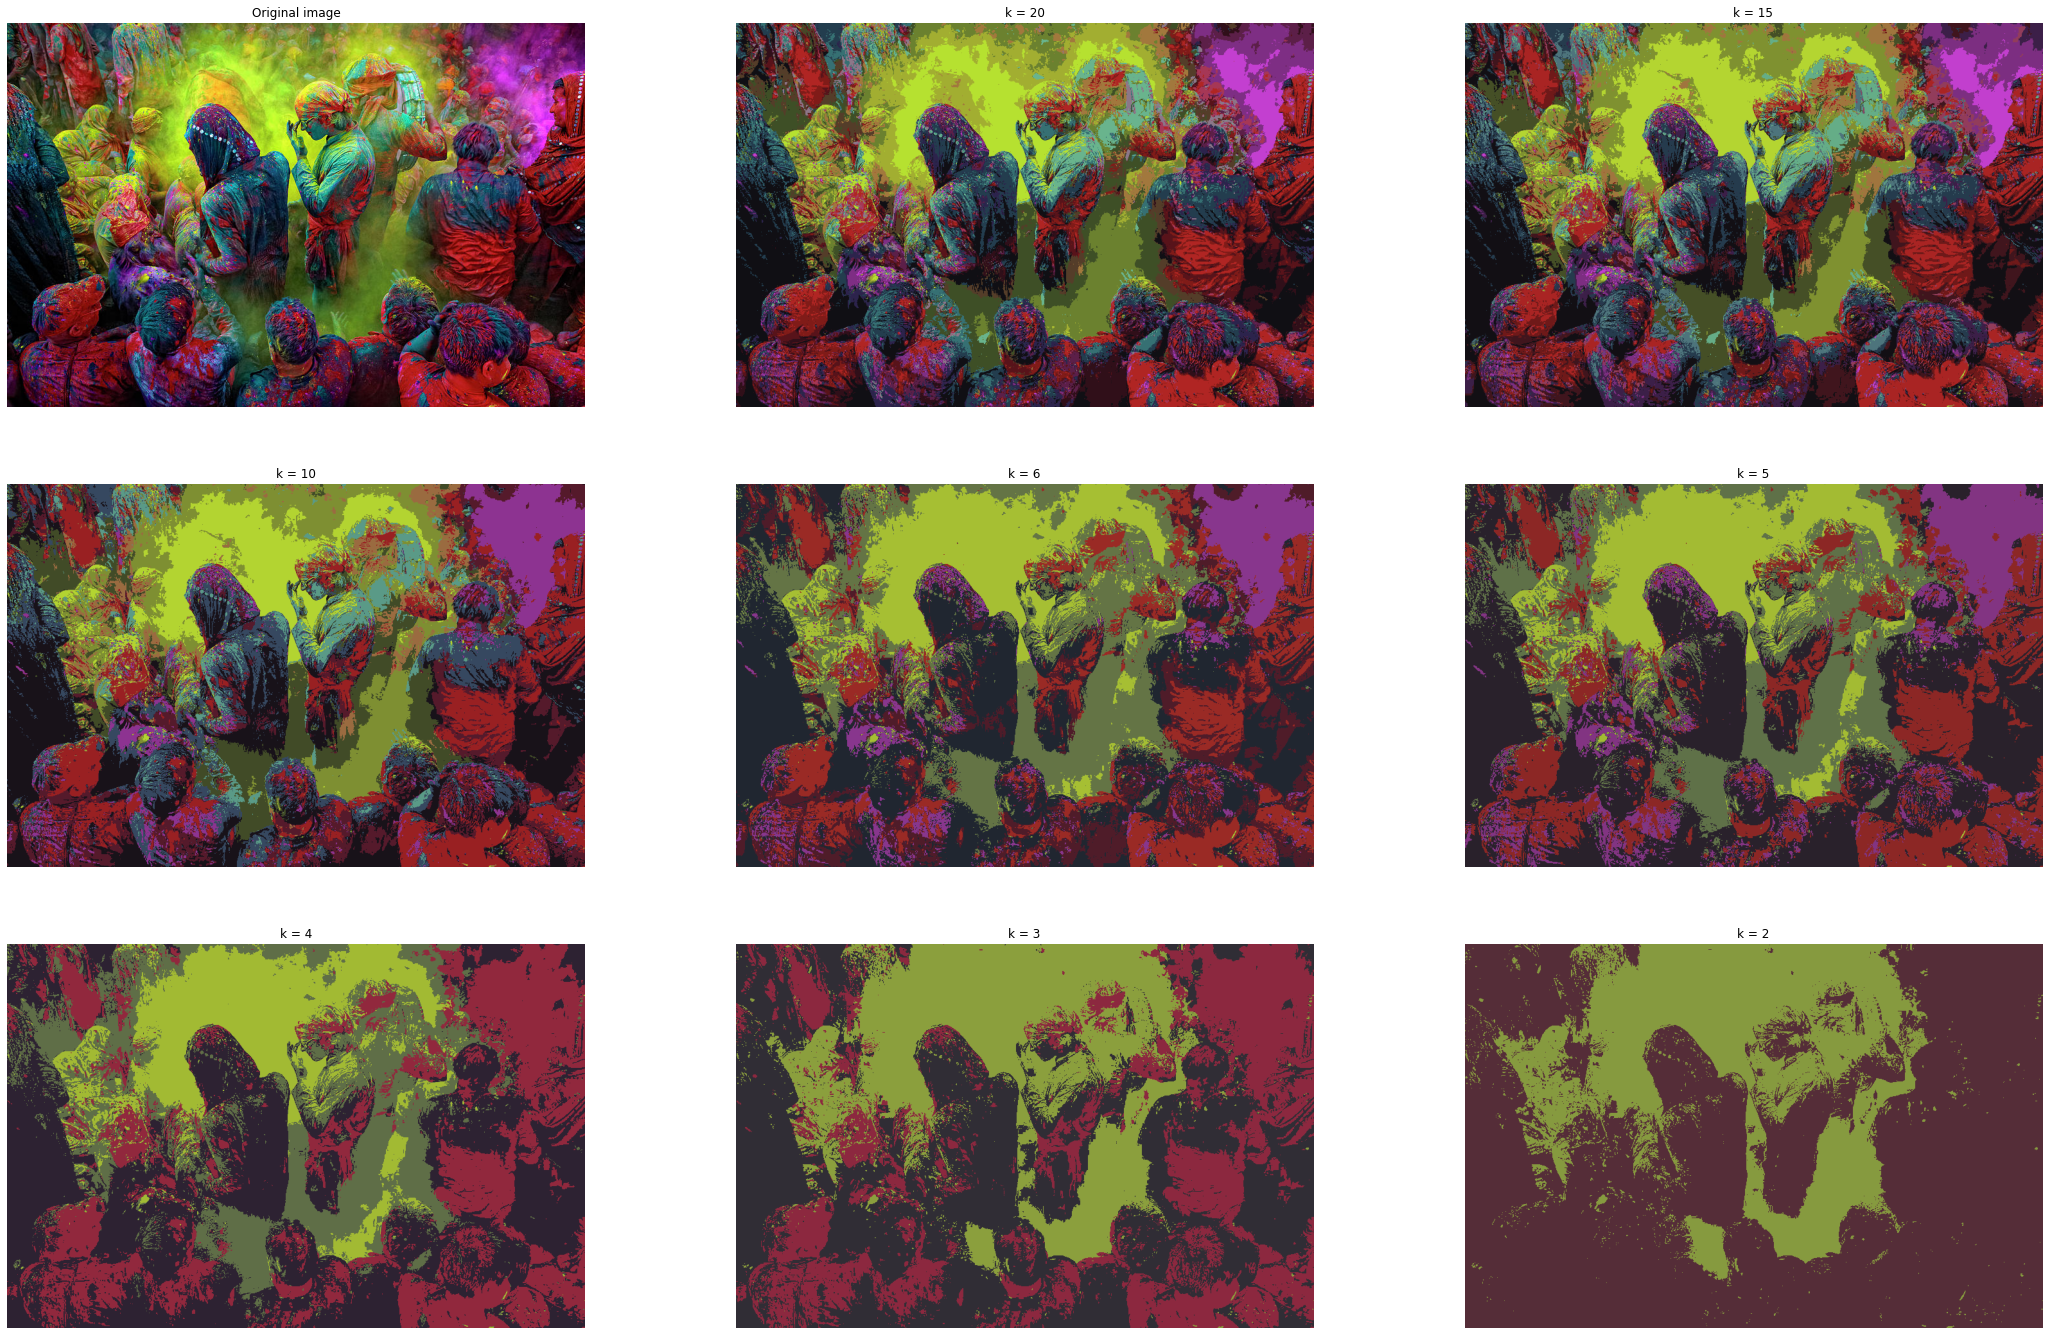

In [9]:
k = [20, 15, 10, 6, 5, 4, 3, 2]
for img in images:
    fig, ax = plt.subplots(3, 3, figsize=(img.size[0] // 24, img.size[1] // 24))
    
    lab_image = rgb2lab(image=img)
    reshaped_image, width, height = reshaper(image=lab_image)
    
    for i, ax in enumerate(fig.axes):
        
        if i == 0:
            ax.imshow(img)
            ax.set_title('Original image')
            ax.axis('off') 
        
        else:
            labels, centroids = kmeans(x=reshaped_image, n_clusters=k[i-1])
            reconstructed_image = reconstructor(centroids, labels, width, height)

            rgb_image = lab2rgb(image=reconstructed_image)

            ax.imshow(rgb_image)
            ax.set_title('k = {}'.format(k[i-1]))
            ax.axis('off')
            
    plt.show()

### Finito